# Failure Type Prediction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("predictive_maintenance.csv")
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [2]:
ohedf = pd.get_dummies(df, columns = ['Failure Type']) 
ohedf.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                    1551         42.8                0       0   
1                    1408         46.3                3       0   
2                    1498         49.4                5       0   
3                    1433         39.5                7       0   
4                    1408         40.0                9       0   

   Failure Type_Heat Dissipation Failure  Failure Type_No Failure  \
0                                      0                        1   
1                                      0                        1   
2                                      0                        1   
3                                      0                        1   
4                                      0                        1   

   Failure Type_Overstrain Failure  Failure Type_Power Failure  \
0                                0                           0   
1                                0                           0   
2                                0                           0   
3                                0                           0   
4                                0                           0   

   Failure Type_Random Failures  Failure Type_Tool Wear Failure  
0                             0                               0  
1                             0                               0  
2                             0                               0  
3                             0                               0  
4                             0                               0

In [3]:
ohedf.rename(columns = {'Failure Type_Overstrain Failure':'OSF','Failure Type_Power Failure':'PWF','Failure Type_Random Failures':'RNF','Failure Type_Tool Wear Failure':'TWF','Failure Type_Heat Dissipation Failure':'HDF'}, inplace = True)
ohedf.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  HDF  \
0                    1551         42.8                0       0    0   
1                    1408         46.3                3       0    0   
2                    1498         49.4                5       0    0   
3                    1433         39.5                7       0    0   
4                    1408         40.0                9       0    0   

   Failure Type_No Failure  OSF  PWF  RNF  TWF  
0                        1    0    0    0    0  
1                        1    0    0    0    0  
2                        1    0    0    0    0  
3                        1    0    0    0    0  
4                        1    0    0    0    0

In [4]:
ohedf.drop('Failure Type_No Failure',axis=1,inplace=True)
ohedf.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  HDF  OSF  \
0                    1551         42.8                0       0    0    0   
1                    1408         46.3                3       0    0    0   
2                    1498         49.4                5       0    0    0   
3                    1433         39.5                7       0    0    0   
4                    1408         40.0                9       0    0    0   

   PWF  RNF  TWF  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [5]:
ohedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      9992 non-null   float64
 4   Process temperature [K]  9996 non-null   float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   HDF                      10000 non-null  uint8  
 10  OSF                      10000 non-null  uint8  
 11  PWF                      10000 non-null  uint8  
 12  RNF                      10000 non-null  uint8  
 13  TWF                      10000 non-null  uint8  
dtypes: float64(3), int64(4)

In [6]:
mean=ohedf["Air temperature [K]"].mean()
ohedf["Air temperature [K]"].fillna(value=mean,inplace=True)

mean1=ohedf["Process temperature [K]"].mean()
ohedf["Process temperature [K]"].fillna(value=mean1,inplace=True)

In [7]:
ohedf.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
HDF                        0
OSF                        0
PWF                        0
RNF                        0
TWF                        0
dtype: int64

In [8]:
ohedf.describe(include='all').T

count unique     top  freq        mean         std  \
UDI                      10000.0    NaN     NaN   NaN      5000.5  2886.89568   
Product ID                 10000  10000  M14860     1         NaN         NaN   
Type                       10000      3       L  6000         NaN         NaN   
Air temperature [K]      10000.0    NaN     NaN   NaN  300.006035    1.999861   
Process temperature [K]  10000.0    NaN     NaN   NaN  310.005852    1.483661   
Rotational speed [rpm]   10000.0    NaN     NaN   NaN   1538.7761  179.284096   
Torque [Nm]              10000.0    NaN     NaN   NaN    39.98691    9.968934   
Tool wear [min]          10000.0    NaN     NaN   NaN     107.951   63.654147   
Target                   10000.0    NaN     NaN   NaN      0.0339    0.180981   
HDF                      10000.0    NaN     NaN   NaN      0.0112    0.105241   
OSF                      10000.0    NaN     NaN   NaN      0.0078    0.087977   
PWF                      10000.0    NaN     NaN   NaN      0.0095    0.097009   
RNF                      10000.0    NaN     NaN   NaN      0.0018     0.04239   
TWF                      10000.0    NaN     NaN   NaN      0.0045    0.066934   

                            min      25%     50%      75%      max  
UDI                         1.0  2500.75  5000.5  7500.25  10000.0  
Product ID                  NaN      NaN     NaN      NaN      NaN  
Type                        NaN      NaN     NaN      NaN      NaN  
Air temperature [K]       295.3    298.3   300.1    301.5    304.5  
Process temperature [K]   305.7    308.8   310.1    311.1    313.8  
Rotational speed [rpm]   1168.0   1423.0  1503.0   1612.0   2886.0  
Torque [Nm]                 3.8     33.2    40.1     46.8     76.6  
Tool wear [min]             0.0     53.0   108.0    162.0    253.0  
Target                      0.0      0.0     0.0      0.0      1.0  
HDF                         0.0      0.0     0.0      0.0      1.0  
OSF                         0.0      0.0     0.0      0.0      1.0  
PWF                         0.0      0.0     0.0      0.0      1.0  
RNF                         0.0      0.0     0.0      0.0      1.0  
TWF                         0.0      0.0     0.0      0.0      1.0

In [9]:
for col in ohedf.columns:
    try:
        ohedf[col]=ohedf[col].astype(float)
    except:
        pass

In [10]:
df_numeric = ohedf.select_dtypes(include=[np.number])
df_numeric.describe(include='all').T

count         mean          std     min      25%  \
UDI                      10000.0  5000.500000  2886.895680     1.0  2500.75   
Air temperature [K]      10000.0   300.006035     1.999861   295.3   298.30   
Process temperature [K]  10000.0   310.005852     1.483661   305.7   308.80   
Rotational speed [rpm]   10000.0  1538.776100   179.284096  1168.0  1423.00   
Torque [Nm]              10000.0    39.986910     9.968934     3.8    33.20   
Tool wear [min]          10000.0   107.951000    63.654147     0.0    53.00   
Target                   10000.0     0.033900     0.180981     0.0     0.00   
HDF                      10000.0     0.011200     0.105241     0.0     0.00   
OSF                      10000.0     0.007800     0.087977     0.0     0.00   
PWF                      10000.0     0.009500     0.097009     0.0     0.00   
RNF                      10000.0     0.001800     0.042390     0.0     0.00   
TWF                      10000.0     0.004500     0.066934     0.0     0.00   

                            50%      75%      max  
UDI                      5000.5  7500.25  10000.0  
Air temperature [K]       300.1   301.50    304.5  
Process temperature [K]   310.1   311.10    313.8  
Rotational speed [rpm]   1503.0  1612.00   2886.0  
Torque [Nm]                40.1    46.80     76.6  
Tool wear [min]           108.0   162.00    253.0  
Target                      0.0     0.00      1.0  
HDF                         0.0     0.00      1.0  
OSF                         0.0     0.00      1.0  
PWF                         0.0     0.00      1.0  
RNF                         0.0     0.00      1.0  
TWF                         0.0     0.00      1.0

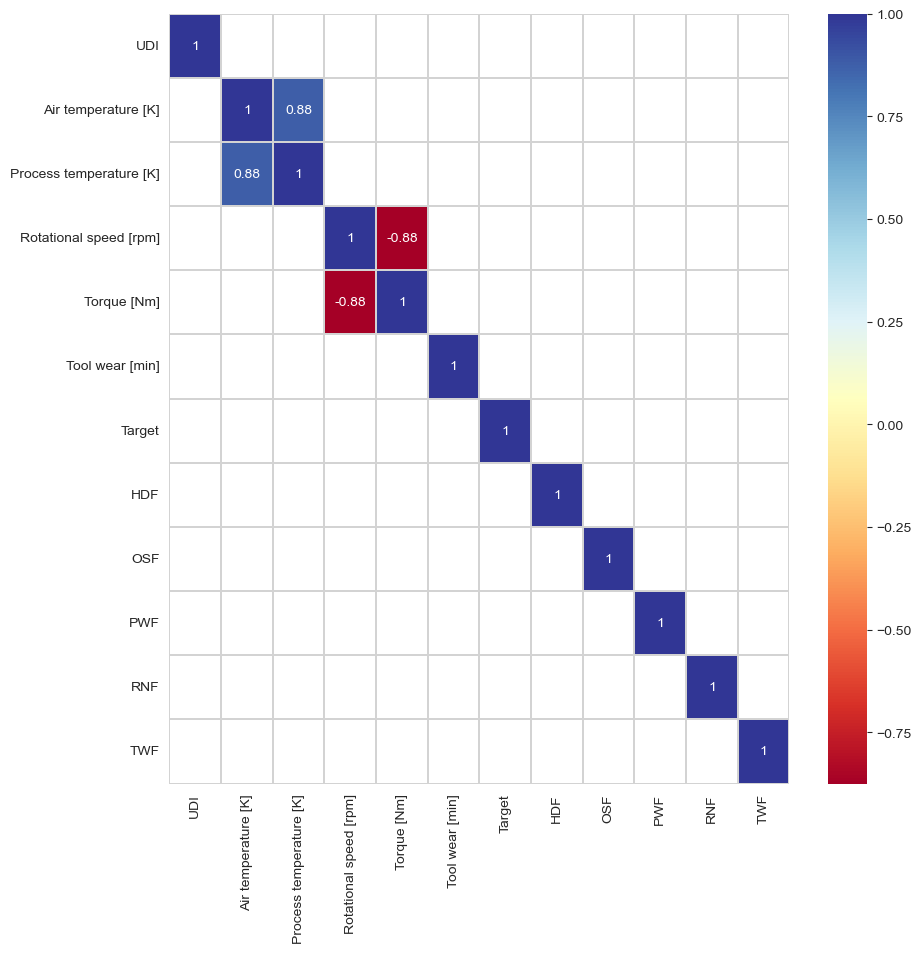

In [11]:
plt.figure(figsize=(10,10))
threshold = 0.80
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = ohedf.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')


    From the above heatmap Air and Process temperature are strongly correlated.
    Torque and rotational speed are also strongly correlated but they individually can effect the output

In [12]:
#These attributes are not required
ohedf.drop(['UDI','Product ID'],axis=1,inplace=True)

In [13]:
ohedf['Target']=0
ohedf['Target'][ohedf['TWF']==1]=1
ohedf['Target'][ohedf['HDF']==1]=2
ohedf['Target'][ohedf['PWF']==1]=3
ohedf['Target'][ohedf['OSF']==1]=4
ohedf['Target'][ohedf['RNF']==1]=5
ohedf.drop(['TWF','HDF','PWF','OSF','RNF'],axis=1,inplace=True)


C:\Users\91733\AppData\Local\Temp\ipykernel_21436\736304353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohedf['Target'][ohedf['TWF']==1]=1
C:\Users\91733\AppData\Local\Temp\ipykernel_21436\736304353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohedf['Target'][ohedf['HDF']==1]=2
C:\Users\91733\AppData\Local\Temp\ipykernel_21436\736304353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohedf['Target'][ohedf['PWF']==1]=

In [14]:
print(ohedf.to_string())

     Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target
0       M           298.100000               308.600000                  1551.0         42.8              0.0       0
1       L           298.200000               308.700000                  1408.0         46.3              3.0       0
2       L           298.100000               308.500000                  1498.0         49.4              5.0       0
3       L           298.200000               308.600000                  1433.0         39.5              7.0       0
4       L           298.200000               308.700000                  1408.0         40.0              9.0       0
5       M           298.100000               308.600000                  1425.0         41.9             11.0       0
6       L           298.100000               308.600000                  1558.0         42.4             14.0       0
7       L           298.100000               308.600000 

In [15]:
df=ohedf
df.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                  1551.0   
1    L                298.2                    308.7                  1408.0   
2    L                298.1                    308.5                  1498.0   
3    L                298.2                    308.6                  1433.0   
4    L                298.2                    308.7                  1408.0   

   Torque [Nm]  Tool wear [min]  Target  
0         42.8              0.0       0  
1         46.3              3.0       0  
2         49.4              5.0       0  
3         39.5              7.0       0  
4         40.0              9.0       0

deriving new features which are more relevant to the prediction of output

In [16]:
df['Power']=df['Rotational speed [rpm]']*df['Torque [Nm]']
df['Power wear']=df['Power']*df['Tool wear [min]']
df['Temperature difference'] = df['Process temperature [K]']-df['Air temperature [K]']
df['Temperature power'] = df['Temperature difference']/df['Power']
df = df[['Air temperature [K]',
         'Process temperature [K]',
         'Rotational speed [rpm]',
         'Torque [Nm]',
         'Tool wear [min]',
         'Power',
         'Power wear',
         'Temperature difference',
         'Temperature power',
         'Type',
         'Target'
        ]]
df.head()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                  1551.0   
1                298.2                    308.7                  1408.0   
2                298.1                    308.5                  1498.0   
3                298.2                    308.6                  1433.0   
4                298.2                    308.7                  1408.0   

   Torque [Nm]  Tool wear [min]    Power  Power wear  Temperature difference  \
0         42.8              0.0  66382.8         0.0                    10.5   
1         46.3              3.0  65190.4    195571.2                    10.5   
2         49.4              5.0  74001.2    370006.0                    10.4   
3         39.5              7.0  56603.5    396224.5                    10.4   
4         40.0              9.0  56320.0    506880.0                    10.5   

   Temperature power Type  Target  
0           0.000158    M       0  
1           0.000161    L       0  
2           0.000141    L       0  
3           0.000184    L       0  
4           0.000186    L       0

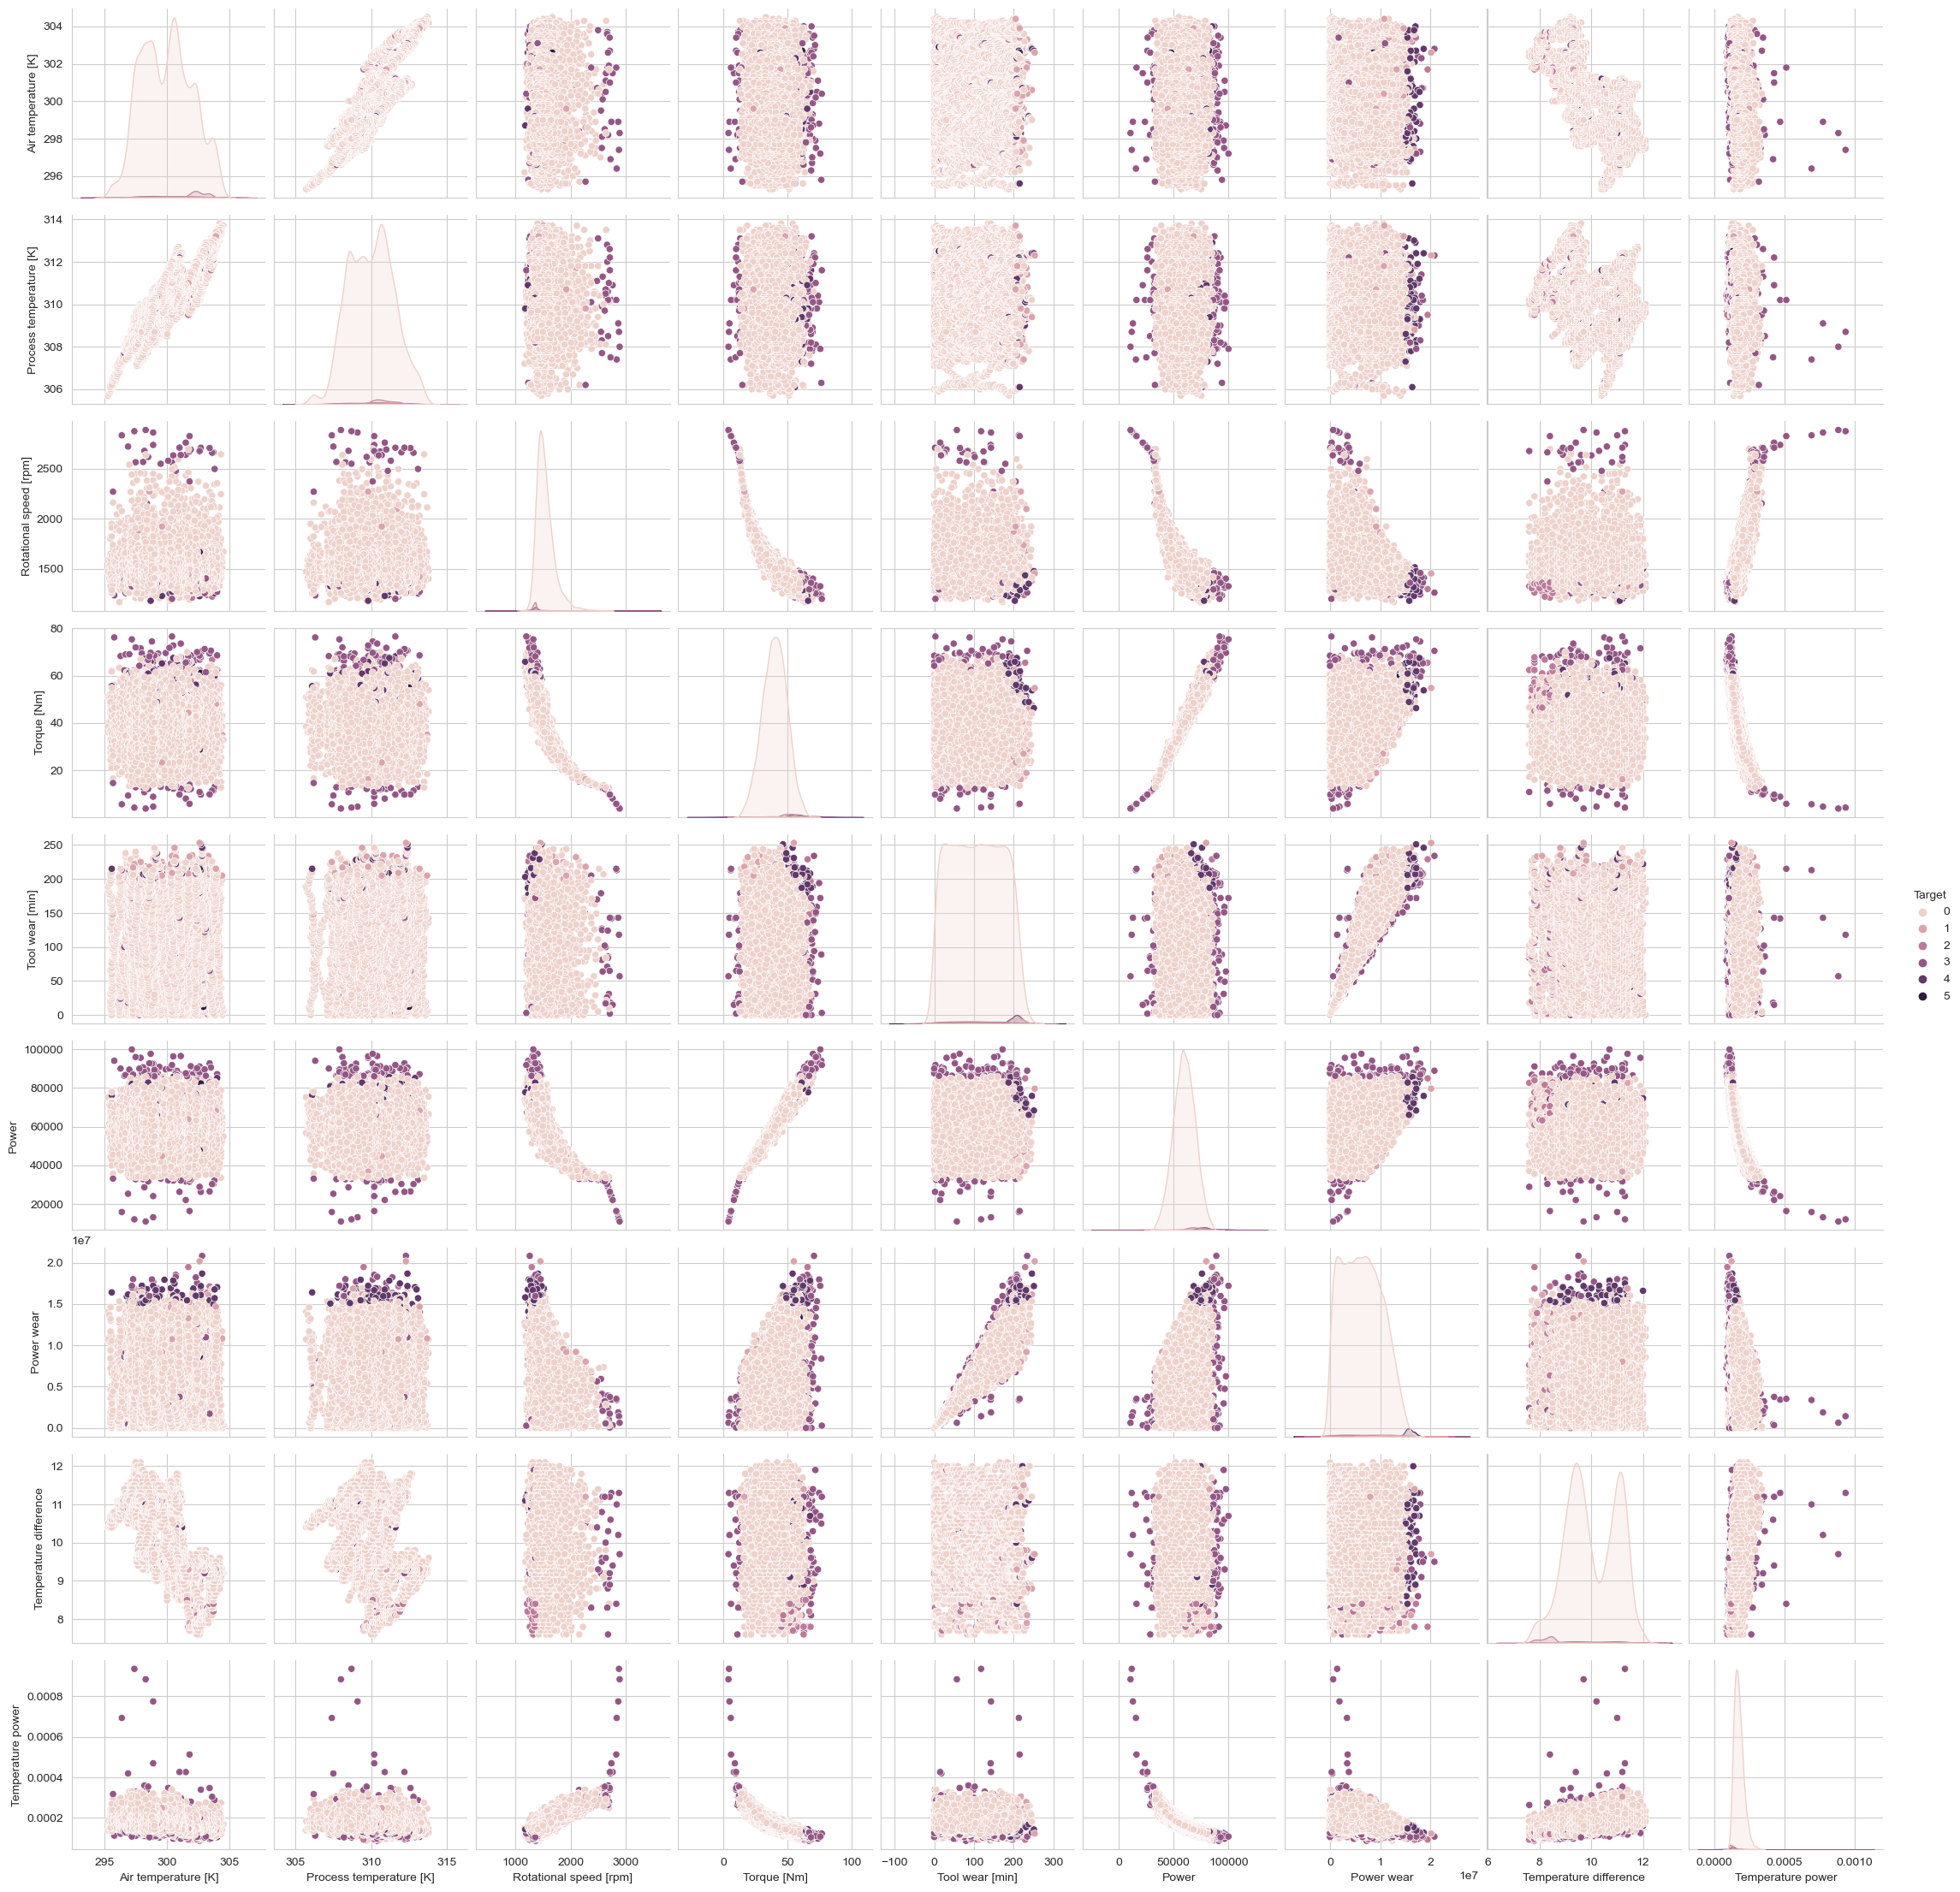

In [17]:
#To understand failure types in newly added features
sns.set_style("whitegrid", {"axes.facecolor": "white"})
sns.pairplot(df,hue="Target")

In [18]:
#encoding
df = pd.get_dummies(df,drop_first=True)
df.head()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                  1551.0   
1                298.2                    308.7                  1408.0   
2                298.1                    308.5                  1498.0   
3                298.2                    308.6                  1433.0   
4                298.2                    308.7                  1408.0   

   Torque [Nm]  Tool wear [min]    Power  Power wear  Temperature difference  \
0         42.8              0.0  66382.8         0.0                    10.5   
1         46.3              3.0  65190.4    195571.2                    10.5   
2         49.4              5.0  74001.2    370006.0                    10.4   
3         39.5              7.0  56603.5    396224.5                    10.4   
4         40.0              9.0  56320.0    506880.0                    10.5   

   Temperature power  Target  Type_L  Type_M  
0           0.000158       0       0       1  
1           0.000161       0       1       0  
2           0.000141       0       1       0  
3           0.000184       0       1       0  
4           0.000186       0       1       0

In [19]:
df = df[['Air temperature [K]',
         'Process temperature [K]',
         'Rotational speed [rpm]',
         'Torque [Nm]',
         'Tool wear [min]',
         'Power',
         'Power wear',
         'Temperature difference',
         'Temperature power',
         'Type_L',
         'Type_M',
         'Target'
        ]]

In [20]:
features = list(df.columns)

In [21]:
for feature in features:
    print(feature + " - " + str(len(df[df[feature].isna()])))

Air temperature [K] - 0
Process temperature [K] - 0
Rotational speed [rpm] - 0
Torque [Nm] - 0
Tool wear [min] - 0
Power - 0
Power wear - 0
Temperature difference - 0
Temperature power - 0
Type_L - 0
Type_M - 0
Target - 0


In [22]:
df_group = df.groupby(['Target'])
df_group.count()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
Target                                                                         
0                      9652                     9652                    9652   
1                        45                       45                      45   
2                       112                      112                     112   
3                        95                       95                      95   
4                        78                       78                      78   
5                        18                       18                      18   

        Torque [Nm]  Tool wear [min]  Power  Power wear  \
Target                                                    
0              9652             9652   9652        9652   
1                45               45     45          45   
2               112              112    112         112   
3                95               95     95          95   
4                78               78     78          78   
5                18               18     18          18   

        Temperature difference  Temperature power  Type_L  Type_M  
Target                                                             
0                         9652               9652    9652    9652  
1                           45                 45      45      45  
2                          112                112     112     112  
3                           95                 95      95      95  
4                           78                 78      78      78  
5                           18                 18      18      18

From the above we can say that the data is imbalanced, so we need to do resampling for correct predictions

In [23]:
df.describe(include='all').T

count          mean           std           min  \
Air temperature [K]      10000.0  3.000060e+02  1.999861e+00    295.300000   
Process temperature [K]  10000.0  3.100059e+02  1.483661e+00    305.700000   
Rotational speed [rpm]   10000.0  1.538776e+03  1.792841e+02   1168.000000   
Torque [Nm]              10000.0  3.998691e+01  9.968934e+00      3.800000   
Tool wear [min]          10000.0  1.079510e+02  6.365415e+01      0.000000   
Power                    10000.0  5.996715e+04  1.019309e+04  10966.800000   
Power wear               10000.0  6.471442e+06  4.016716e+06      0.000000   
Temperature difference   10000.0  9.999818e+00  1.001920e+00      7.600000   
Temperature power        10000.0  1.721259e-04  3.841563e-05      0.000086   
Type_L                   10000.0  6.000000e-01  4.899224e-01      0.000000   
Type_M                   10000.0  2.997000e-01  4.581494e-01      0.000000   
Target                   10000.0  9.560000e-02  5.435901e-01      0.000000   

                                  25%           50%           75%  \
Air temperature [K]      2.983000e+02  3.001000e+02  3.015000e+02   
Process temperature [K]  3.088000e+02  3.101000e+02  3.111000e+02   
Rotational speed [rpm]   1.423000e+03  1.503000e+03  1.612000e+03   
Torque [Nm]              3.320000e+01  4.010000e+01  4.680000e+01   
Tool wear [min]          5.300000e+01  1.080000e+02  1.620000e+02   
Power                    5.310540e+04  5.988390e+04  6.687375e+04   
Power wear               3.096389e+06  6.287880e+06  9.489756e+06   
Temperature difference   9.300000e+00  9.800000e+00  1.100000e+01   
Temperature power        1.463405e-04  1.669555e-04  1.921023e-04   
Type_L                   0.000000e+00  1.000000e+00  1.000000e+00   
Type_M                   0.000000e+00  0.000000e+00  1.000000e+00   
Target                   0.000000e+00  0.000000e+00  0.000000e+00   

                                  max  
Air temperature [K]      3.045000e+02  
Process temperature [K]  3.138000e+02  
Rotational speed [rpm]   2.886000e+03  
Torque [Nm]              7.660000e+01  
Tool wear [min]          2.530000e+02  
Power                    9.998040e+04  
Power wear               2.081921e+07  
Temperature difference   1.210000e+01  
Temperature power        9.361434e-04  
Type_L                   1.000000e+00  
Type_M                   1.000000e+00  
Target                   5.000000e+00

In [24]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2
import plotly.graph_objects as go
best_features = SelectKBest(score_func=chi2,k='all')

x = df.iloc[:,:-1]
y = df.iloc[:,-1]
fit = best_features.fit(x,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(x.columns)

feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=True,inplace=True)

fig = go.Figure(go.Bar(
            x=feature_score['score'][0:21],
            y=feature_score['feature'][0:21],
            orientation='h'))

fig.update_layout(title="Top 20 Features",
                  height=1200,
                  showlegend=False,
                 )

fig.show()


In [25]:
#select features with backward stepwise regression
Selected_Features = []
import statsmodels.api as sm

def backward_regression(x, y, initial_list=[], threshold_out=0.05, verbose=True):
    included = list(x.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(x, y)


worst_feature : Type_M, 0.7784393713689007 

Selected Features:
['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Power', 'Power wear', 'Temperature difference', 'Temperature power', 'Type_L']


In [26]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

feature_names=list(x.columns)


In [27]:
np.shape(x)

(10000, 11)

Finally selected features are 11

Modelling and Evaluation

We saw that majority target class is 0, which inturn says taht data is imbalanced.So we balance the data

In [28]:
from imblearn.over_sampling import SMOTE, SVMSMOTE,RandomOverSampler
oversamp = RandomOverSampler(random_state=0)

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify=y)

In [30]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [31]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,roc_auc_score, plot_confusion_matrix,matthews_corrcoef
from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix

import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score'])

Using KNN 

In [32]:
# %%time
from sklearn.neighbors import KNeighborsClassifier
# start = time.time()
model = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
# end_train = time.time()
y_predictions = model.predict(x_test) # These are the predictions from the test data.
# end_predict = time.time()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [33]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted',zero_division=1)
f1s = f1_score(y_test, y_predictions, average='weighted')
# MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
# ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
# print("MCC: "+ "{:.2%}".format(MCC))
# print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
# print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
# print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
# print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s]

Accuracy: 97.05%
Recall: 97.05%
Precision: 96.54%
F1-Score: 96.19%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



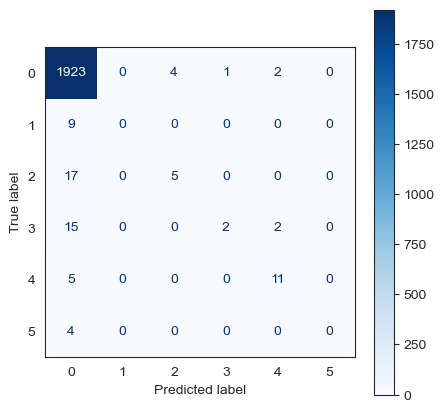

In [34]:
plt.rcParams['figure.figsize']=5,5 
plt.rcParams['font.size'] = 10
sns.set_style("white")
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

Decision Tree

In [35]:
# %%time
from sklearn.tree import DecisionTreeClassifier
# start = time.time()
model = DecisionTreeClassifier().fit(x_train,y_train)
# end_train = time.time()
y_predictions = model.predict(x_test) # These are the predictions from the test data.
# end_predict = time.time()


In [36]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
# ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s]


Accuracy: 98.55%
Recall: 98.55%
Precision: 98.72%
F1-Score: 98.63%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



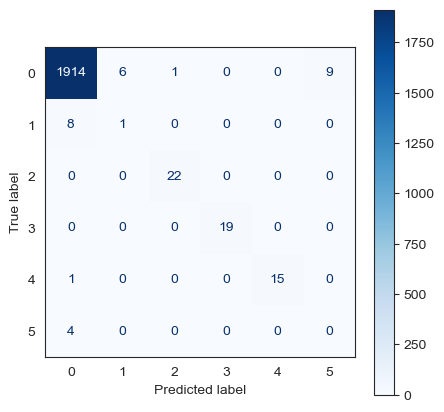

In [37]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

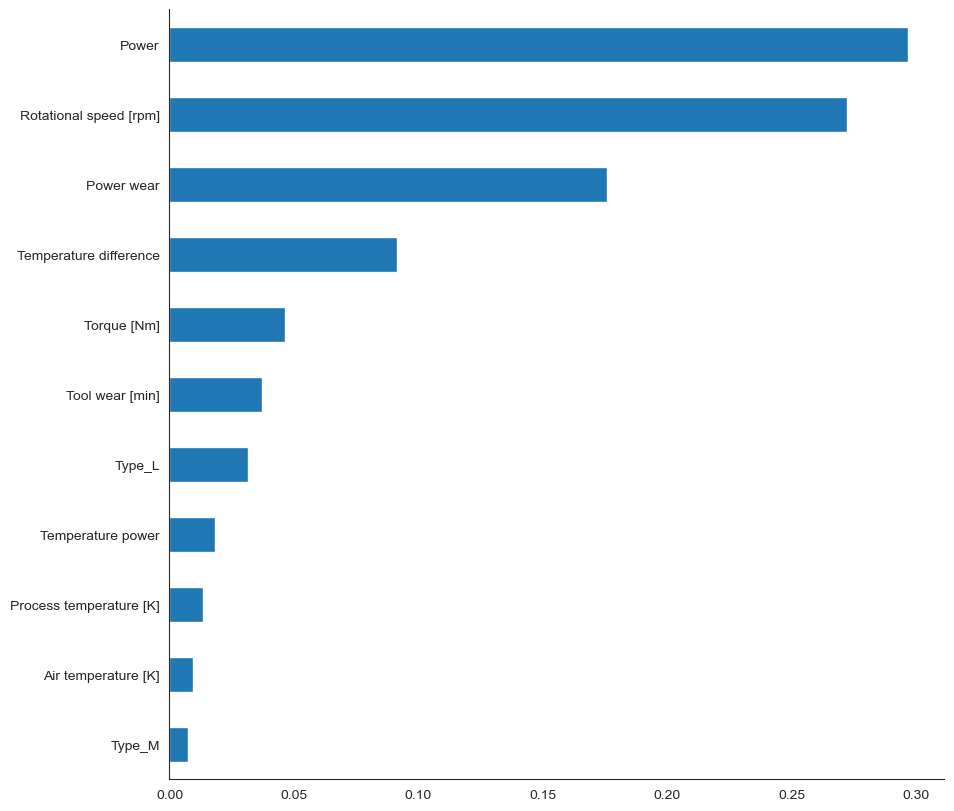

In [38]:
#To know which feature is the most impacting

plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(x_train,y_train)

y_predictions = model.predict(x_test) # These are the predictions from the test data.


In [40]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted',zero_division=1)
f1s = f1_score(y_test, y_predictions, average='weighted')
# ROC_AUC = roc_auc_score(y_test, model.predict_proba(x_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))

model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s]

Accuracy: 99.15%
Recall: 99.15%
Precision: 99.16%
F1-Score: 98.83%


In [ ]:
mytes=[]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



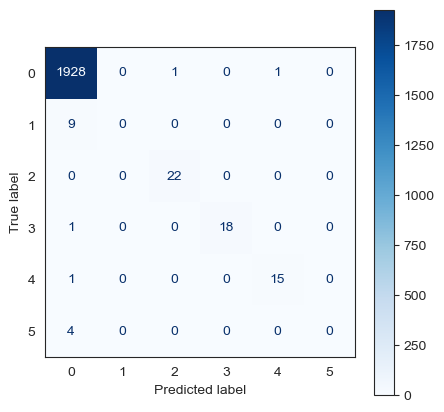

In [41]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

Gradient Boosting

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier().fit(x_train,y_train)

y_predictions = model.predict(x_test) # These are the predictions from the test data.


In [43]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted',zero_division=1)
f1s = f1_score(y_test, y_predictions, average='weighted')
# ROC_AUC = roc_auc_score(y_test, model.predict_proba(x_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))

model_performance.loc['Gradient Boosting'] = [accuracy, recall, precision, f1s]

Accuracy: 99.15%
Recall: 99.15%
Precision: 98.65%
F1-Score: 98.90%


In [44]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}'
                                                        
                                                                     })